In [2]:
# Reads in GRD file of slabs location and depth for each slab from the Slab 2.0 data set

# Data was downloaded from: 
# Data is kept in ~/<Mybin/Data-Sets/Slab2Distribute_Mar2018

# Uses pygmt for plotting the depth as color
# on a global map (can be modified for preferred projection and region)

import pygmt

In [3]:
# List of all the slabs in the data set
loc = ['alu','cal','cam','car','cas',
       'cot','hal','hel','him','hin',
       'izu','ker','kur','mak','man',
       'mue','pam','phi','png','puy',
       'ryu','sam','sco','sol','sul',
       'sum','van'];

27


In [4]:
# Directory where data is kep
slab2dir ="/Users/billen/Box-Sync/Mybin/Data-Sets/Slab2Distribute_Mar2018/"
cptfile ="slabdepth.cpt"
pygmt.makecpt(cmap="buda",series=(-700,0,100),output=cptfile)

pygmt.config(FONT='Times-Roman')
pygmt.config(FONT_LABEL='Times-Roman,12p')

In [5]:
# Basic global map in gmt
fig = pygmt.Figure()
fig.basemap(region="d", projection="W180/15c", frame=True)
grid = pygmt.datasets.load_earth_relief(resolution="10m",registration="gridline")
colormap1 = pygmt.grd2cpt(grid=grid,cmap='gray')
fig.grdimage(grid=grid,cmap=colormap1)
fig.coast(shorelines="1/0.5p,black")

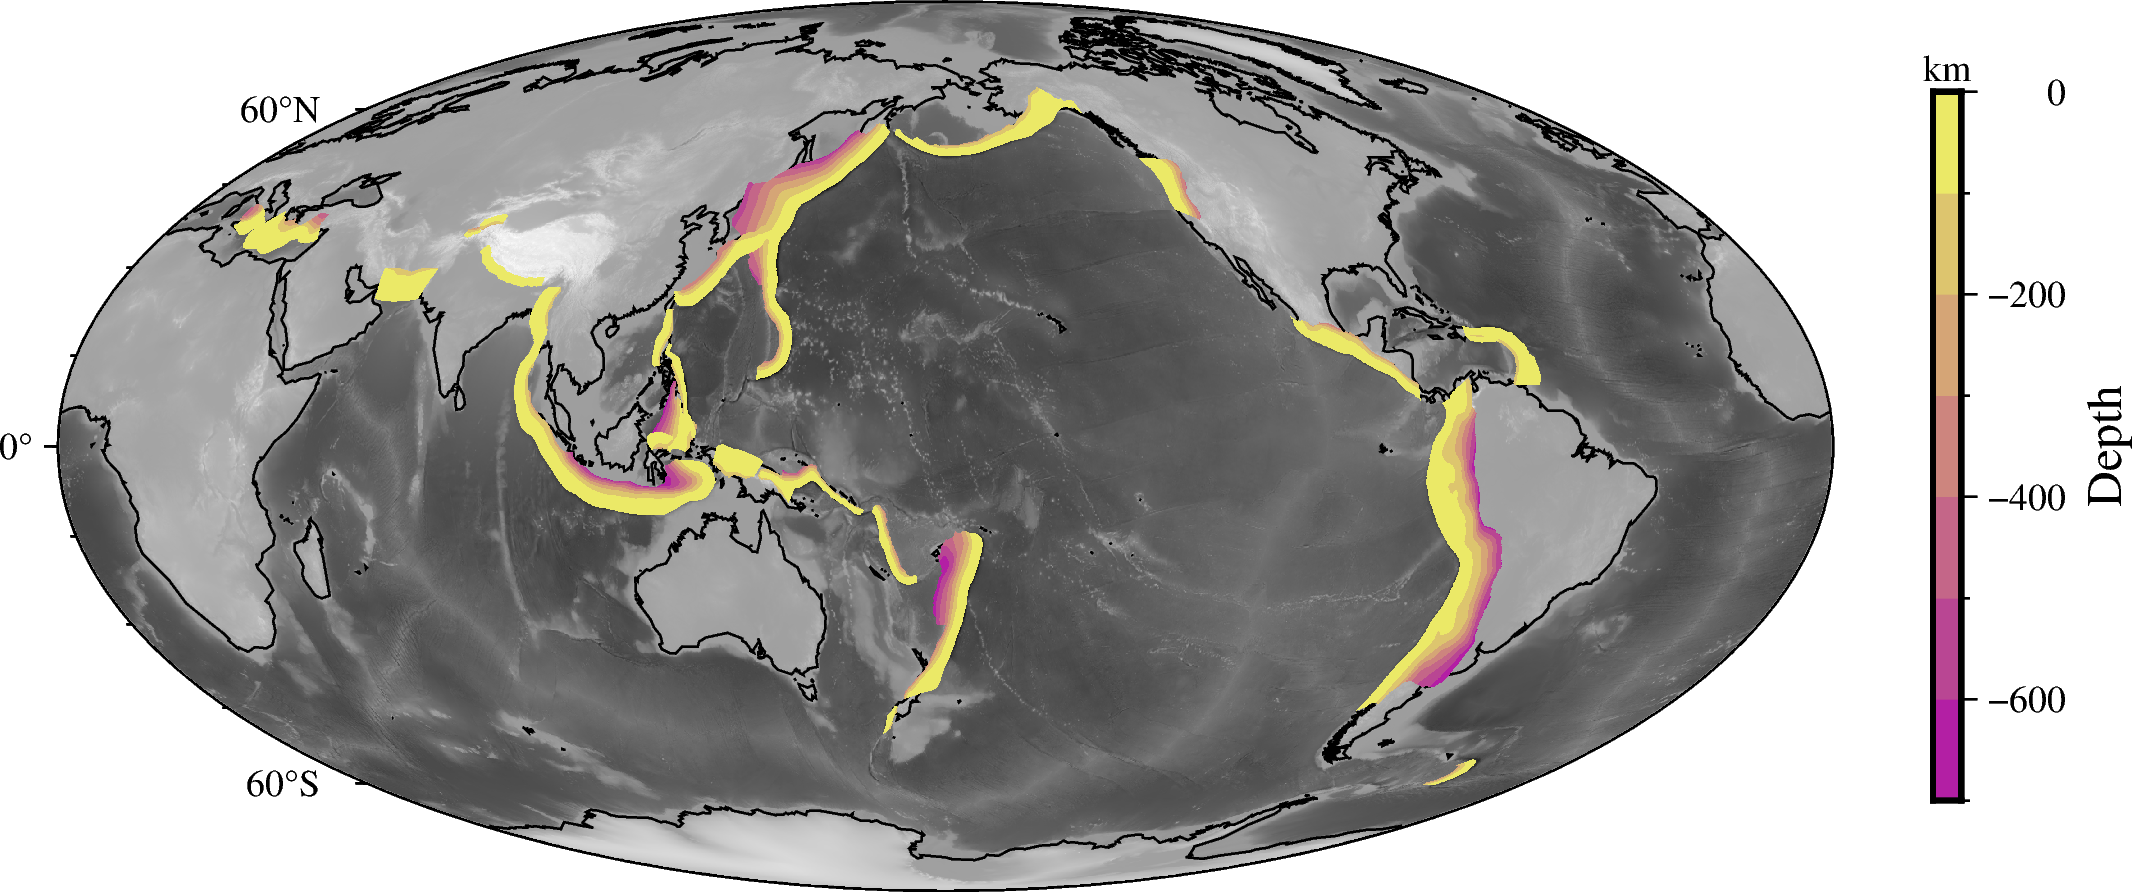

In [6]:
# Loop through each slab in the data set and add to the figure using grdimage
for i in range(len(loc)):
    grdfile = slab2dir + loc[i] + '_slab2_dep.grd'
    fig.grdimage(grid=grdfile,cmap=cptfile,nan_transparent=True)

# add a colorbar for depth    
fig.colorbar(cmap=cptfile,position="JMR", box=False, frame=["x+lDepth", "y+lkm"])

fig.show()

In [7]:
# Save figure to file
fig.savefig('map_slab2_depths.png')